# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd


# load data
wine=datasets.load_wine()
print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names)
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

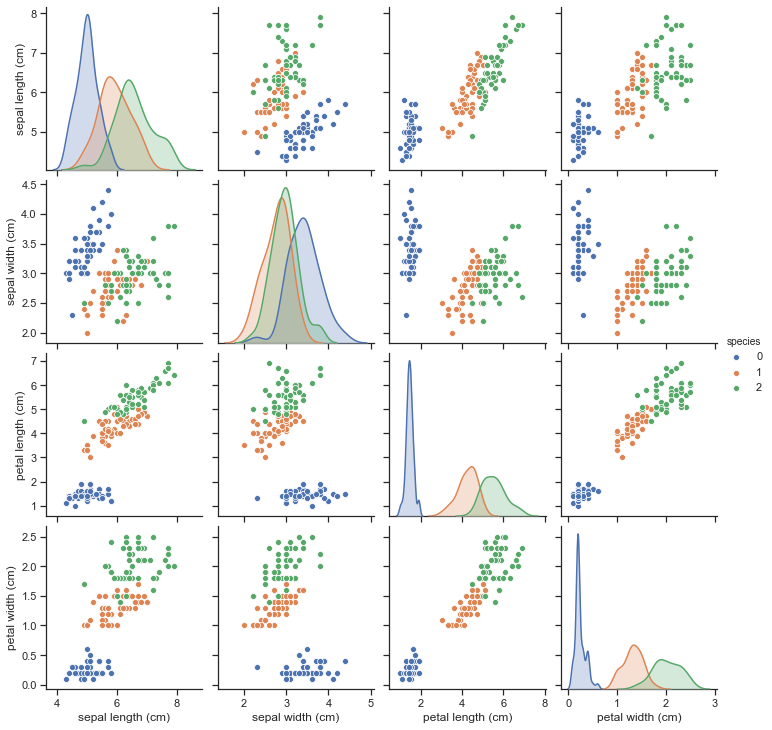

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [2]:
import seaborn as sns
# define plotting function
def myplotGrid(X,y):
    '''
    Returns a grid with each off-diagonal subplot showing the interaction between two features, and each of the classes in a different colour

            Parameters:
                    X (numpy.ndarray): Dataset
                    y (numpy.ndarray): Labels - class of wine in the given dataset

            Returns:
                    seaborn pairplot
    '''
    
    df = pd.DataFrame(X)
    df.columns = selected_features
    # change columns names to selected features, otherwise it will use defalut numbers which have no meanings
    df['Class'] = y
    sns.pairplot(df, vars=df.columns[:-1], hue='Class') 
    # use df.columns[:-1] so that 'Class' column will not be shown in the plot

C:\Users\David Xu\Downloads\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


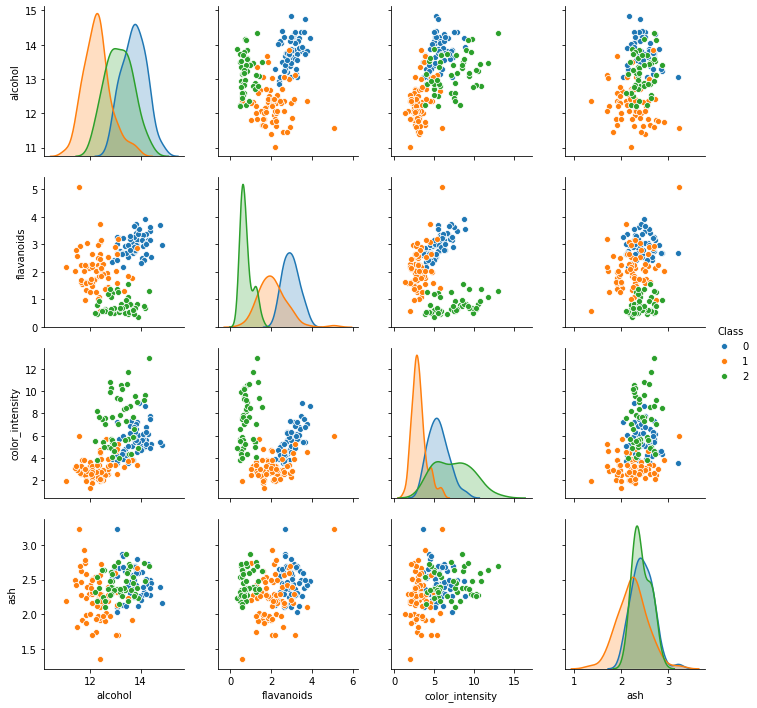

In [3]:
# run the plotting function
myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

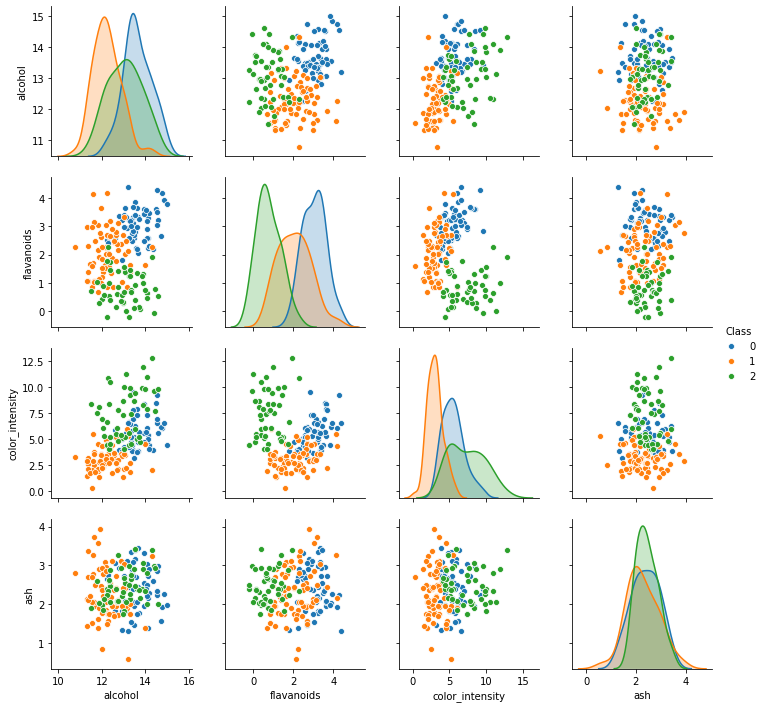

In [4]:
# noise code 
# initialize random seed to replicate results over different runs
mySeed = 12345
np.random.seed(mySeed) 
XN = X + np.random.normal(0,0.5,X.shape)
myplotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


Answer: 

Flavanoids and color_intensity. Because in terms of pair relationships, the scatter diagram of flavanoids and color_intensity among 3 classes is most **dispersed** compared to other pairs.Moreover, within flavanoids and color_intensity features themselves, 3 classes are distributed **dispersedly** with less overlapped areas compared to ash and alcohol features. Therefore, the classifier is able to differentiate which class the new data falls into based on flavanoids and color_intensity features.


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


Answer: 


Without noise, the scatter plots between two features are more concentrated and mixed with each other while the distribution of each features are less smooth. On the contrary, with Gaussian noise added, the scatter plots between two features are more dispersed while the ditrubution of each features are more smooth. Therefore, plotting with added Gaussian noise tends to be better training data for the model.

## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [5]:
# helper code
import math
def distanceCalculation(vector1, vector2, option='euclidean'):
    '''
    Calculate euclidean or manhattan distance depending on the "option" input

            Parameters:
                    vector1 (numpy.ndarray): New input dataset
                    vector2 (numpy.ndarray): Given dataset
                    option (str): By default, it is euclidean while user can choose 'manhattan' as well

            Returns:
                    distance (float)
    '''
    distance = 0
    
    if option=='euclidean':
        for i in range(len(vector1)):
            distance = distance + (vector1[i]-vector2[i])**2 # Calculate euclidean distance
        distance = math.sqrt(distance)
        
    elif option=='manhattan':
        for i in range(len(vector1)):
            distance = distance + abs(vector1[i]-vector2[i]) # Calculate manhattan distance
            
    return distance

def getNeighbors(X,y,X_,k,distanceOption='euclidean'):
    '''
    Returns k nearest neighbors with class information in a list format

            Parameters:
                    X: Training data (features)
                    y: Labels of training data
                    X_: Test data or new input data
                    k: Number of neighbors
                    distanceOption: By default, it is euclidean while users can also choose manhattan

            Returns:
                    neighbors: a list of k nearest neighbors with class information
    '''
    distanceList = []
    neighbors = []
    
    for j in range(len(X)):
        distance = distanceCalculation(X_, X[j],distanceOption)
        distanceList.append((distance, y[j])) # Calculate the distance between test data and each training data row. Store the result in distanceList
        
    distanceList.sort() # Sort the distanceList based on distance calculated before in an ascending order
    distanceList = distanceList[:k] # Only need to save k nearest neighbors
    
    for tup in distanceList:
        neighbors.append(tup[1]) # Only need the class information of k nearest neighbors, we don't need the distance information to process next step
    
    return neighbors



In [6]:
# mykNN code
def mykNN(X,y,X_,k,distanceOption='euclidean'):
    '''
    Returns prediction of class based on KNN algorithm and new input data

            Parameters:
                    X: Training data (features)
                    y: Labels of training data
                    X_: Test data or new input data
                    k: Number of neighbors
                    distanceOption: By default, it is euclidean while users can also choose manhattan

            Returns:
                    y_pred: a list of class prediction
    '''
    y_pred = []
    for X_testRow in X_: # X_ can contain many sets of test data or new input data, use loop function to predict them one by one
        neighbors = getNeighbors(X,y,X_testRow,k,distanceOption)
        y_ = max(neighbors, key=neighbors.count) # From the list of class of k nearest neighbors, I want to know which class appears most frequent
        y_pred.append(y_) # I pick up the most frequent one as prediction and store the result in y_pred list
        
    return y_pred


## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [7]:
# confusion matrix, accuracy, precision, recall, etc. 
def testTrainSplit (X, y, testRatio):
    '''
    Randomly shuffle the dataset and divide it into testing and training set

            Parameters:
                    X: Dataset
                    y: Labels of dataset
                    testRaio: How many percentage of data you want to put into test data

            Returns:
                    4 variables X_train, y_train, X_test, y_test
    '''
    shuffleIndexes = np.random.permutation(len(X)) # Shuffle 0 to len(X-1) in a random order
    testSize = int(len(X) * testRatio)
    testIndexes = shuffleIndexes[:testSize] # Take top x% of data as test data
    trainIndexes = shuffleIndexes[testSize:] # Take rest of data as training data
    X_train = X[trainIndexes]
    y_train = y[trainIndexes]
    X_test = X[testIndexes]
    y_test = y[testIndexes]
    return X_train, y_train, X_test, y_test

def confusionMatrix (y_test, y_pred):
    '''
    Returns confusion matrix based on prediction and real labels/class on test data

            Parameters:
                    y_test: real class on test data
                    y_pred: class prediction using KNN algorithm

            Returns:
                    confusionMatrix: a numpy matrix
    '''
    
    classes = np.unique(y_test) # extract the different classes
    confusionMatrix = np.zeros((len(classes), len(classes))) # initialize the confusion matrix with zeros

    for i in range(len(classes)):
        for j in range(len(classes)):
            confusionMatrix[i, j] = np.sum((y_test == classes[i]) & (y_pred == classes[j])) # Construct confusion matrix
    
    return confusionMatrix

def accuracyScore (y_test, y_pred):
    '''
    Returns accuracy rate = number of correct predictions / total number of predictions

            Parameters:
                    y_test: real class on test data
                    y_pred: class prediction using KNN algorithm

            Returns:
                    accuracy (float): accuracy rate
    '''
    accuracy = (y_test == y_pred).sum()/len(y_test)
    return accuracy

In [8]:
# test evaluation code
X_train, y_train, X_test, y_test = testTrainSplit(X, y, 0.2) # Split training and testing data
y_ = mykNN(X_train, y_train, X_test, 5) # Predict class based on test data

accuracy = accuracyScore (y_test, y_)
myMatrix = confusionMatrix(y_test,y_)
print("MY OWN FUNCTION \n")
print('Confusion matrix using my function is\n',myMatrix,'\n')
print('Accuracy calculated using my function is\n', accuracy, '\n')

#Calculate class-relative precision and recall and finally its weighted-average precision and recall

TP1 = myMatrix[0][0]
FP1 = myMatrix[1][0] + myMatrix[2][0]
FN1 = myMatrix[0][1] + myMatrix[0][2]
precision1 = TP1/(TP1+FP1)
recall1 = TP1/(TP1+FN1)
weight1 = sum(myMatrix[0])/sum(sum(myMatrix))

TP2 = myMatrix[1][1]
FP2 = myMatrix[0][1] + myMatrix[2][1]
FN2 = myMatrix[1][0] + myMatrix[1][2]
precision2 = TP2/(TP2+FP2)
recall2 = TP2/(TP2+FN2)
weight2 = sum(myMatrix[1])/sum(sum(myMatrix))

TP3 = myMatrix[2][2]
FP3 = myMatrix[0][2] + myMatrix[1][2]
FN3 = myMatrix[2][0] + myMatrix[2][1]
precision3 = TP3/(TP3+FP3)
recall3 = TP3/(TP3+FN3)
weight3 = sum(myMatrix[2])/sum(sum(myMatrix))

weighted_precision = precision1*weight1 + precision2*weight2 + precision3*weight3
weighted_recall = recall1*weight1 + recall2*weight2 + recall3*weight3
print ("Using my own function, weighted precision is ",weighted_precision,"\n")
print("Using my own function, weighted recall is ",weighted_recall,"\n")

# Verification by sklearn module
print ("SKLEARN MODULE \n")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Confusion matrix using sklearn is\n',confusion_matrix(y_test,y_), '\n')
print('Accuracy using sklearn is\n', accuracy_score(y_test,y_), '\n')
print('Weighted precision using sklearn is\n', precision_score(y_test,y_,average='weighted'), '\n')
print('Weighted recall using sklearn is\n', recall_score(y_test,y_,average='weighted'), '\n')

MY OWN FUNCTION 

Confusion matrix using my function is
 [[10.  0.  0.]
 [ 2.  8.  0.]
 [ 0.  0. 15.]] 

Accuracy calculated using my function is
 0.9428571428571428 

Using my own function, weighted precision is  0.9523809523809523 

Using my own function, weighted recall is  0.9428571428571428 

SKLEARN MODULE 

Confusion matrix using sklearn is
 [[10  0  0]
 [ 2  8  0]
 [ 0  0 15]] 

Accuracy using sklearn is
 0.9428571428571428 

Weighted precision using sklearn is
 0.9523809523809524 

Weighted recall using sklearn is
 0.9428571428571428 




## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [14]:
# myNestedCrossVal code
def myNestedCrossVal (X,y,nFolds,kList,distanceOptionList,mySeed):
    '''
    Implement nested cross-validation KNN algorithm. Pick up the best parameters and calculate accuracy rate with test data

            Parameters:
                    X: Original data
                    y: Labels of original data
                    nFolds: number of nested folds
                    kList: List of k which need to be tested and compared to pick up the best parameter
                    distanceOptionList: Include euclidean and manhattan
                    mySeed: A random seed to keep the random shuffle result same

            Returns:
                    accuracyList_fold: A list of accuracy rates per fold
                    confusionMatrixList: Store confusion matrix for each fold
    '''
    
    np.random.seed(mySeed)
    # Creates an array of random permutation of indices between 0 and the length of the X data.
    # The indices are then split up into (folds) folds
    indices = np.random.permutation(np.arange(0,len(X),1))
    indices = np.array_split(indices, nFolds)
    
    confusionMatrixList = []
    accuracyList_fold = []
    
    # Randomly split test fold, validation fold and training fold
    for iFold in range(0,nFolds):
        print('new iterration for fold ',iFold+1,'\n')
        testFold = indices[iFold]
        training_folds = []
        remaining_folds = np.delete(range(0,nFolds), iFold)
        validationFold = indices[remaining_folds[0]]
        for i in range(1,len(remaining_folds)):
            training_folds += (indices[remaining_folds[i]].tolist()) # Indices of training fold = all remaining folds

        X_train = X[training_folds]
        y_train = y[training_folds]
        X_test = X[testFold]
        y_test = y[testFold]
        X_val = X[validationFold]
        y_val = y[validationFold]
        
        resultList = []
        
        # Begin to test each parameters of k (1-10) and distance calculation methods (euclidean and mahattan) using validation data
        for distanceOption in distanceOptionList:
            for k in kList:            
                y_ = mykNN(X_train, y_train, X_val, k, distanceOption)
                accuracy = accuracyScore (y_val, y_)            
                resultList.append((accuracy, k, distanceOption)) # Store result in resultList
                print('k=',k,'; Distance function=',distanceOption, '; Accuracy=%.4f' %(accuracy), '\n') # Print result for each k and distance calculation option

        resultList.sort(reverse=True) #Sort the list from most accurate to least accurate, the first tuple has parameters that I want
        
        accuracy_val_best = resultList[0][0]
        k_best = resultList[0][1]
        distanceOption_best = resultList[0][2]
        y_pred = mykNN(X_train, y_train, X_test, k_best, distanceOption_best) # Use best parameters in each fold to predict class and then use test data to get accuracy rate
        accuracy_test_best = accuracyScore (y_test, y_pred)
        
        # Print result about best set of parameters in each fold
        print('The best set of parameters for fold ', iFold+1, '\n') 
        print('k=',k_best,'; Distance function=',distanceOption_best, '; Accuracy on validation data=%.4f' %(accuracy_val_best), '; Accuracy on test data=%.4f' %(accuracy_test_best),'\n')
        print('Its confusion matrix on the testing set is \n', confusionMatrix(y_test, y_pred), '\n')
        
        confusionMatrixList.append(confusionMatrix(y_test, y_pred))
        accuracyList_fold.append(accuracy_test_best) # Store accuracy rate against test data using best parameters in each fold
    return accuracyList_fold, confusionMatrixList

In [15]:
# evaluate clean data code

accuracies_fold_clean, confusionMatrixList_clean = myNestedCrossVal(X,y,5,[*range(1,11)],['euclidean','manhattan'],mySeed)

print ("Accuracy rate in each folder is", accuracies_fold_clean, "\n")
print ("Average accuracy rate is", sum(accuracies_fold_clean)/len(accuracies_fold_clean))

new iterration for fold  1 

k= 1 ; Distance function= euclidean ; Accuracy=0.9167 

k= 2 ; Distance function= euclidean ; Accuracy=0.9167 

k= 3 ; Distance function= euclidean ; Accuracy=0.9444 

k= 4 ; Distance function= euclidean ; Accuracy=0.9444 

k= 5 ; Distance function= euclidean ; Accuracy=0.9444 

k= 6 ; Distance function= euclidean ; Accuracy=0.9444 

k= 7 ; Distance function= euclidean ; Accuracy=0.9444 

k= 8 ; Distance function= euclidean ; Accuracy=0.9444 

k= 9 ; Distance function= euclidean ; Accuracy=0.9444 

k= 10 ; Distance function= euclidean ; Accuracy=0.9444 

k= 1 ; Distance function= manhattan ; Accuracy=0.9444 

k= 2 ; Distance function= manhattan ; Accuracy=0.9444 

k= 3 ; Distance function= manhattan ; Accuracy=0.9444 

k= 4 ; Distance function= manhattan ; Accuracy=0.9444 

k= 5 ; Distance function= manhattan ; Accuracy=0.9444 

k= 6 ; Distance function= manhattan ; Accuracy=0.9444 

k= 7 ; Distance function= manhattan ; Accuracy=0.9444 

k= 8 ; Distance fu

In [16]:
# evaluate noisy data code
accuracies_fold_noisy, confusionMatrixList_noisy = myNestedCrossVal(XN,y,5,[*range(1,11)],['euclidean','manhattan'],mySeed)

print ("Accuracy rate in each folder is", accuracies_fold_noisy, "\n")
print ("Average accuracy rate is", sum(accuracies_fold_noisy)/len(accuracies_fold_noisy))

new iterration for fold  1 

k= 1 ; Distance function= euclidean ; Accuracy=0.8611 

k= 2 ; Distance function= euclidean ; Accuracy=0.8611 

k= 3 ; Distance function= euclidean ; Accuracy=0.8889 

k= 4 ; Distance function= euclidean ; Accuracy=0.8889 

k= 5 ; Distance function= euclidean ; Accuracy=0.8889 

k= 6 ; Distance function= euclidean ; Accuracy=0.8611 

k= 7 ; Distance function= euclidean ; Accuracy=0.9444 

k= 8 ; Distance function= euclidean ; Accuracy=0.8611 

k= 9 ; Distance function= euclidean ; Accuracy=0.8889 

k= 10 ; Distance function= euclidean ; Accuracy=0.8611 

k= 1 ; Distance function= manhattan ; Accuracy=0.8889 

k= 2 ; Distance function= manhattan ; Accuracy=0.8889 

k= 3 ; Distance function= manhattan ; Accuracy=0.8889 

k= 4 ; Distance function= manhattan ; Accuracy=0.9167 

k= 5 ; Distance function= manhattan ; Accuracy=0.9167 

k= 6 ; Distance function= manhattan ; Accuracy=0.8889 

k= 7 ; Distance function= manhattan ; Accuracy=0.8889 

k= 8 ; Distance fu

## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 |  .972 |  10 | Manhattan  |
| 2 | .944  |  10 | Manhattan  |
| 3 | .889  |  10 | Manhattan  |
| 4 | .857  |  10 | Manhattan  |
| 5 | .943  |  10 | Manhattan  |
| **total** | .921 $\pm$ .041795|   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .944  |  7  | Euclidean  |
| 2 | .917  |  10 | Manhattan  |
| 3 | .917  |  10 | Manhattan  |
| 4 | .886  |  10 | Manhattan  |
| 5 | .971  |  10 | Manhattan  |
| **total** | .927 $\pm$ .028657|   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [12]:
def precision_recall (matrix):
    '''
    Calculate class-relative precision and recall, but it only applies to 3 classes

            Parameters:
                    matrix: 3x3 confusion matrix

            Returns:
                    precision: A list of precision corresponding class 1 to 3
                    recall: A list of recall corresponding class 1 to 3
    '''
    precision = []
    recall = []
    TP1 = matrix[0][0]
    FP1 = matrix[1][0] + matrix[2][0]
    FN1 = matrix[0][1] + matrix[0][2]
    precision.append(TP1/(TP1+FP1))
    recall.append(TP1/(TP1+FN1))

    TP2 = matrix[1][1]
    FP2 = matrix[0][1] + matrix[2][1]
    FN2 = matrix[1][0] + matrix[1][2]
    precision.append(TP2/(TP2+FP2))
    recall.append(TP2/(TP2+FN2))

    TP3 = matrix[2][2]
    FP3 = matrix[0][2] + matrix[1][2]
    FN3 = matrix[2][0] + matrix[2][1]
    precision.append(TP3/(TP3+FP3))
    recall.append(TP3/(TP3+FN3))

    return precision, recall


print('CLEAN')
# clean data summary results

# Add 5-folded confusion matrix together for clean data and convert it into panda dataframe with index and column names
confusionMatrixSummary_clean = pd.DataFrame(data=sum(confusionMatrixList_clean), index=['Class 0', 'Class 1', 'Class 2'], columns=['Class 0', 'Class 1', 'Class 2'])
print (confusionMatrixSummary_clean, '\n')

precision_clean, recall_clean = precision_recall (sum(confusionMatrixList_clean))

for i in range(0,3):
    print ("Class ",i," precision is ",precision_clean[i],". Recall is ",recall_clean[i]) # Print out precision and recall for each class


print('\nNOISY')
# clean data summary results. It uses same functions as clean data
confusionMatrixSummary_noisy = pd.DataFrame(data=sum(confusionMatrixList_noisy), index=['Class 0', 'Class 1', 'Class 2'], columns=['Class 0', 'Class 1', 'Class 2'])
print (confusionMatrixSummary_noisy, '\n')

precision_noisy, recall_noisy = precision_recall (sum(confusionMatrixList_noisy))

for i in range(0,3):
    print ("Class ",i," precision is ",precision_noisy[i],". Recall is ",recall_noisy[i])

CLEAN
         Class 0  Class 1  Class 2
Class 0     59.0      0.0      0.0
Class 1     11.0     58.0      2.0
Class 2      0.0      1.0     47.0 

Class  0  precision is  0.8428571428571429 . Recall is  1.0
Class  1  precision is  0.9830508474576272 . Recall is  0.8169014084507042
Class  2  precision is  0.9591836734693877 . Recall is  0.9791666666666666

NOISY
         Class 0  Class 1  Class 2
Class 0     53.0      6.0      0.0
Class 1      5.0     65.0      1.0
Class 2      0.0      1.0     47.0 

Class  0  precision is  0.9137931034482759 . Recall is  0.8983050847457628
Class  1  precision is  0.9027777777777778 . Recall is  0.9154929577464789
Class  2  precision is  0.9791666666666666 . Recall is  0.9791666666666666


## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer: 

No change except the first fold. Under the assumption that we use 12345 as the random seed, I can say k=10, distance caculation using Manhattan is the best choice regardless of clean or noisy data. If the random seed is changed, the best parameters may be changed as well.


### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer: 

I will further check the average distance for each suggested class and pick up the suggested class with smaller average distance as prediction. If their average distance is same, I can only randomly pick up a class as prediction.<br/>
<br/>For the simple example mentioned in the question with k=2, the pseudocode can be written as follows:
<br/>if 2 nearest neighbours suggest class i and class j respectively:
<br/> if class i distance < class j distance:
<br/> &emsp;&emsp;&emsp;&emsp; y_prediction = class i
<br/> elif class i distance > class j distance:
<br/> &emsp;&emsp;&emsp;&emsp; y_prediction = class j
<br/> else:
<br/> &emsp;&emsp;&emsp;&emsp;class i

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer: 



I will change my criteria to find best parameters. For wine dataset, I used accuracy as criteria to find best parameters as we don't really have a strong preference of precision or recall. However, for other data like breast cancer dataset, we have to consider the tradeoff between precision and recall.<br/>
<br/>For example, we hate to fail to diagnose breast cancer for the patients who actually have cancer, which may aggravate the disease. Therefore, we try to avoid false negative as much as possible, which means find parameters with highest recall, even if precision might be lower.